In [66]:
import pandas as pd

dataset = pd.read_csv('Data-Mining-Tarea-1/Data-Mining-Tarea-1/beer_reviews/beer_reviews.csv')
size, features = dataset.shape

print("\nEl dataset completo consta de {} registros y {} caracteristicas.".format(size, features))


El dataset completo consta de 1586614 registros y 13 caracteristicas.


In [67]:
dataset.drop('brewery_id', 1, inplace=True)
dataset.drop('brewery_name', 1, inplace=True)
dataset.drop('review_time', 1, inplace=True)
dataset.drop('review_profilename', 1, inplace=True)
dataset.drop('beer_style', 1, inplace=True)
dataset.drop('beer_name', 1, inplace=True)
dataset.drop('beer_beerid', 1, inplace=True)

In [68]:
percentage = 0.1
seed = 10

datasetSample = dataset.sample(n = int(size*percentage/100), random_state = seed)
size, features = datasetSample.shape

print("El tamanno de la muestra es de {} registros lo que representa un {}% del total.".format(size, percentage))
print("Ademas luego de las eliminaciones consta de solo {} caracteristicas".format(features))

El tamanno de la muestra es de 1586 registros lo que representa un 0.1% del total.
Ademas luego de las eliminaciones consta de solo 6 caracteristicas


In [69]:
datasetSample = datasetSample.fillna(0)

In [70]:
beers = datasetSample.as_matrix()

In [71]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

beers_std = StandardScaler().fit_transform(beers)

sklearn_pca = PCA(n_components=2)
beers_redu = sklearn_pca.fit_transform(beers_std)

In [72]:
clusters = 10 #NUMERO DE CLUSTERS

### HAC (Hierarchical agglomerative clustering)

El clustering aglomerativo jerárquico es una estrategia de clustering *bottom-up*, esto quiere decir que a partir de los datos se van generando distintos cluster anidados hasta obtener un único cluster. Para medir la distancia entre clusters se utilizan diferentes métodos. A continuación, se presentan los resultados sobre la muestra del dataset usando, *complete link* y *Ward link*. 

#### Complete Link

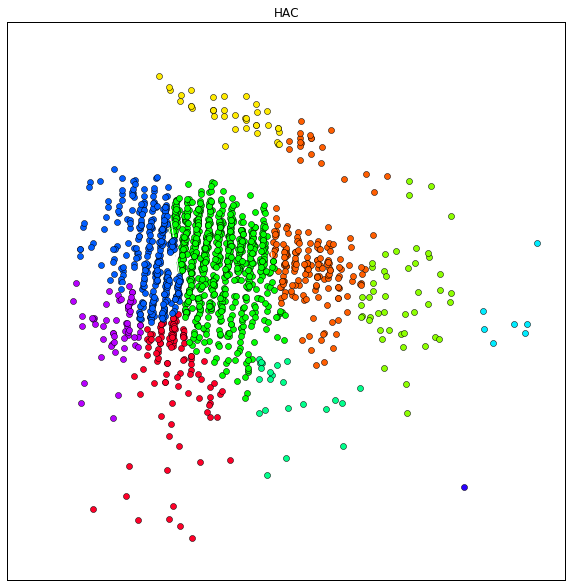

In [73]:
%matplotlib inline
import numpy as np
import sklearn
import scipy
import matplotlib
from matplotlib import pyplot as plt
from sklearn.cluster import AgglomerativeClustering as hac

clustering = hac(linkage="complete", n_clusters=clusters, affinity="euclidean")
clustering.fit(beers_redu)

fig = plt.figure(figsize=(10, 10))
cmap = plt.cm.get_cmap('gist_rainbow')
colors = [cmap(i) for i in np.linspace(0, 1, clusters+1)]
ax = fig.add_subplot(1, 1, 1)
ax.set_title('HAC')

for k, col in zip(range(len(colors)), colors):
    my_members = clustering.labels_ == k
    ax.plot(beers_redu[my_members, 0], beers_redu[my_members, 1], 'w', markerfacecolor=col, marker='o')

ax.set_xticks(())
ax.set_yticks(())
plt.show()

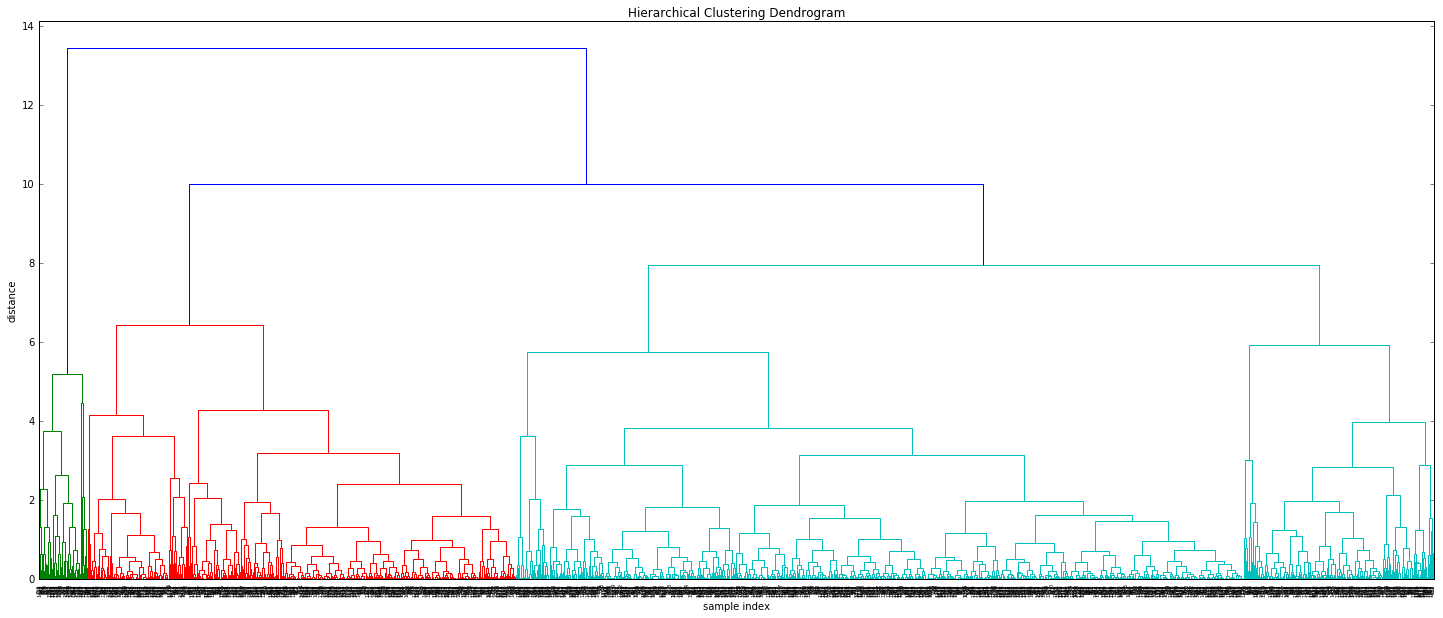

In [74]:
from scipy.cluster.hierarchy import dendrogram, linkage

Z = linkage(beers_redu, 'complete')

# calculate full dendrogram
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(Z)
plt.show()

#### Ward Link

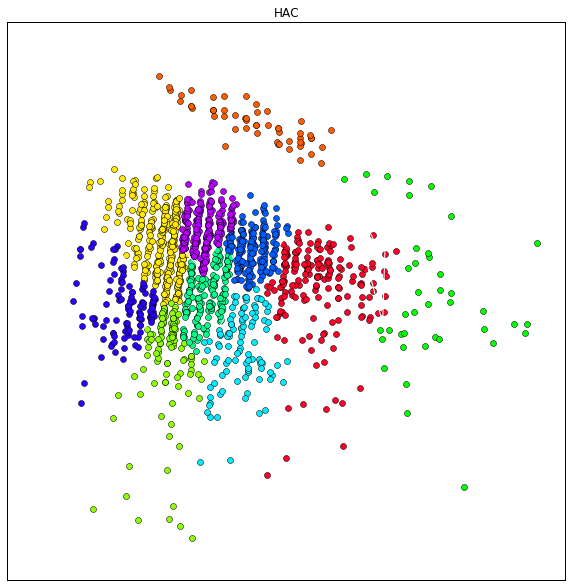

In [75]:
### WARD ###

clustering = hac(linkage="ward", n_clusters=clusters, affinity="euclidean")
clustering.fit(beers_redu)

fig = plt.figure(figsize=(10, 10))
cmap = plt.cm.get_cmap('gist_rainbow')
colors = [cmap(i) for i in np.linspace(0, 1, clusters+1)]
ax = fig.add_subplot(1, 1, 1)
ax.set_title('HAC')

for k, col in zip(range(len(colors)), colors):
    my_members = clustering.labels_ == k
    ax.plot(beers_redu[my_members, 0], beers_redu[my_members, 1], 'w', markerfacecolor=col, marker='o')

ax.set_xticks(())
ax.set_yticks(())
plt.show()

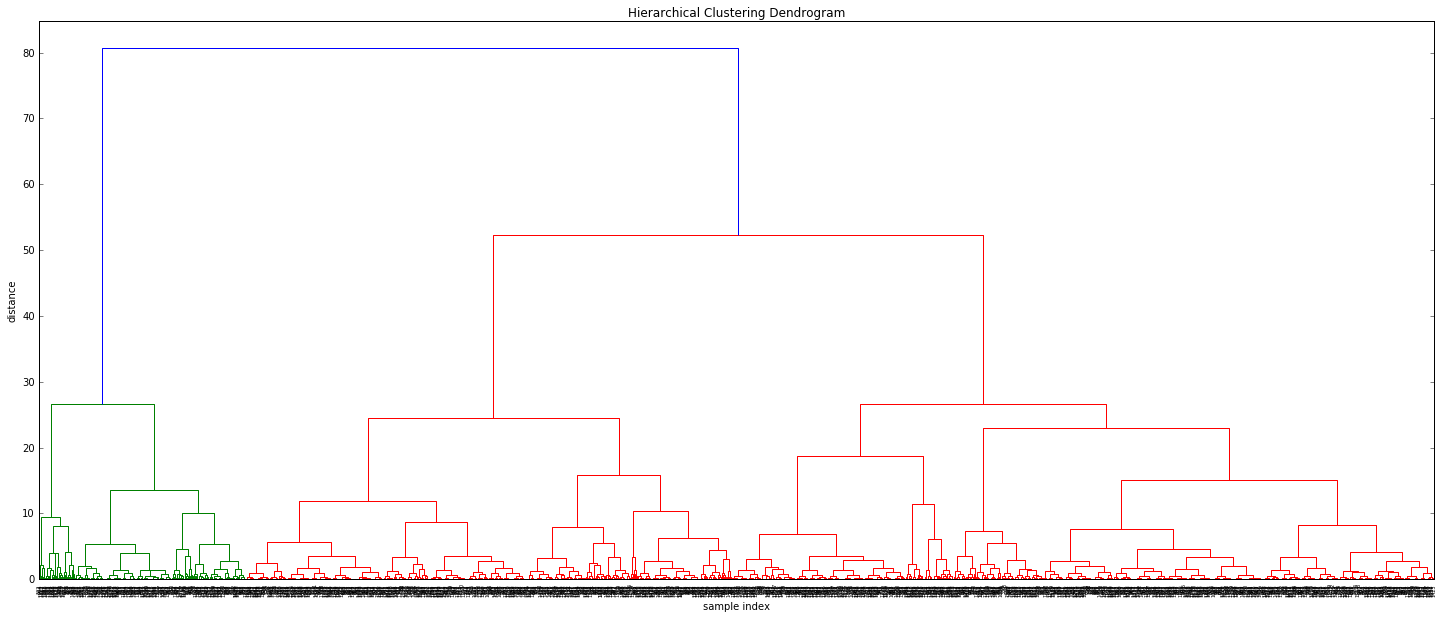

In [76]:
Z = linkage(beers_redu, 'ward')

# calculate full dendrogram
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(Z)
plt.show()

### DBSCAN

numero de clusters: 3



C:\Users\david\Anaconda3\lib\site-packages\matplotlib\lines.py:1106: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._markerfacecolor != fc:


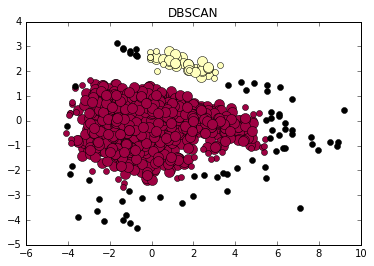

In [77]:
import numpy, scipy
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn import datasets

db = DBSCAN(eps=0.6, min_samples=10).fit(beers_redu)
labels = db.labels_
unique_labels = set(labels)
print("numero de clusters: {}\n".format(len(unique_labels)))


core_samples_mask = numpy.zeros_like(db.labels_, dtype = bool)
core_samples_mask[db.core_sample_indices_] = True
colors = plt.cm.Spectral(numpy.linspace(0, 1, len(unique_labels)))

for k, col in zip(unique_labels, colors):
    if k == -1:
        col = 'k'

    class_member_mask = (labels == k)

    xy = beers_redu[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col, markeredgecolor='k', markersize=10)
    xy = beers_redu[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col, markeredgecolor='k', markersize=6)

plt.title("DBSCAN")
plt.show()